**PART 1: Data scraping and preparation**

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime

#Part 1
#step 1
#scraping data
url = 'https://web.archive.org/web/20201112015618/https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
print(soup.prettify())
# prettify() function will allow us to print the HTML content in a nested form that is easy to read and will help extract the available tags that are needed.

#find the table
table = soup.find('table', {'class': 'table table-striped table-responsive-md'})
rows = table.find_all('tr')

# Extracting data
data = []
for row in rows[1:]:  # Skip the header row
    columns = row.find_all('td')
    flare_data = [column.get_text(strip=True) for column in columns]
    data.append(flare_data)
print(data)
# Define column names
columns = ["Rank", "X-Class", "Date", "Region", "Start Time", "Max Time", "End Time", "Movie"]

# Create a DataFrame
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
df


<!DOCTYPE html>
<html lang="en">
 <head>
  <script src="//archive.org/includes/analytics.js?v=cf34f82" type="text/javascript">
  </script>
  <script type="text/javascript">
   window.addEventListener('DOMContentLoaded',function(){var v=archive_analytics.values;v.service='wb';v.server_name='wwwb-app204.us.archive.org';v.server_ms=505;archive_analytics.send_pageview({});});
  </script>
  <script charset="utf-8" src="//web-static.archive.org/_static/js/bundle-playback.js?v=6XRi73ky" type="text/javascript">
  </script>
  <script charset="utf-8" src="//web-static.archive.org/_static/js/wombat.js?v=txqj7nKC" type="text/javascript">
  </script>
  <script>
   window.RufflePlayer=window.RufflePlayer||{};window.RufflePlayer.config={"autoplay":"on","unmuteOverlay":"hidden"};
  </script>
  <script src="//web-static.archive.org/_static/js/ruffle.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   __wm.init("https://web.archive.org/web");
  __wm.wombat("https://www.spaceweat

,Rank,X-Class,Date,Region,Start Time,Max Time,End Time,Movie
0,1,X28+,2003/11/04,0486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,0486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,0808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,0486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,0930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,0486,17:03,17:25,17:39,MovieView archive


In [2]:
#Step 2
#drop last column
df= df.drop(columns=["Movie"])

# Combine date and time columns into datetime columns
for index, row in df.iterrows():
    date = pd.to_datetime(row['Date'] + ' ' + row['Start Time'], format='%Y/%m/%d %H:%M')
    df.at[index, 'Start Datetime'] = date

    date = pd.to_datetime(row['Date'] + ' ' + row['Max Time'], format='%Y/%m/%d %H:%M')
    df.at[index, 'Max Datetime'] = date

    date = pd.to_datetime(row['Date'] + ' ' + row['End Time'], format='%Y/%m/%d %H:%M')
    df.at[index, 'End Datetime'] = date
print(df)
# Droping the original date and time columns
df = df.drop(columns=['Date', 'Start Time', 'Max Time', 'End Time'])
print(df)
# Replacing regions coded as "-" with NaN
df = df.replace({'Region': {'-': pd.NA}})

#Rearrage region to the end

df = df[
    ["Rank",	"X-Class",	"Start Datetime",	"Max Datetime",	"End Datetime","Region" ]
]
# Display the modified DataFrame
df

   Rank X-Class        Date Region Start Time Max Time End Time  \
0     1    X28+  2003/11/04   0486      19:29    19:53    20:06   
1     2    X20+  2001/04/02   9393      21:32    21:51    22:03   
2     3  X17.2+  2003/10/28   0486      09:51    11:10    11:24   
3     4    X17+  2005/09/07   0808      17:17    17:40    18:03   
4     5   X14.4  2001/04/15   9415      13:19    13:50    13:55   
5     6     X10  2003/10/29   0486      20:37    20:49    21:01   
6     7    X9.4  1997/11/06   8100      11:49    11:55    12:01   
7     8    X9.3  2017/09/06   2673      11:53    12:02    12:10   
8     9      X9  2006/12/05   0930      10:18    10:35    10:45   
9    10    X8.3  2003/11/02   0486      17:03    17:25    17:39   
10   11    X8.2  2017/09/10   2673      15:35    16:06    16:31   
11   12    X7.1  2005/01/20   0720      06:36    07:01    07:26   
12   13    X6.9  2011/08/09   1263      07:48    08:05    08:08   
13   14    X6.5  2006/12/06   0930      18:29    18:47    19:0

,Rank,X-Class,Start Datetime,Max Datetime,End Datetime,Region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,0486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,0486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,0808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,0486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,0930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,0486


In [3]:
#step 3
# Scrap data from NASA
nasa_url = 'https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'
nasa_response = requests.get(nasa_url)
nasa_soup = BeautifulSoup(nasa_response.text, 'html.parser')

# Find the table
nasa_table = nasa_soup.find('pre')

# Table as a single string
nasa_table_text = nasa_table.get_text()
print(nasa_table_text)
# Spliting the table text into lines
nasa_lines = nasa_table_text.split('\n')
print(nasa_lines)
print(len(nasa_lines))
# Store NASA data rows in a list
nasa_data = []
for nasa_line in nasa_lines[12:]:  # Skip the first 12 lines (header rows)
    if nasa_line.strip():  # Skip empty lines
        nasa_values = nasa_line.split()

        # Check if there are at least 15 columns (including "Plots")
        if len(nasa_values) >= 15:
            # Combine data after the "Plots" column into a single "Miscellaneous" column
            miscellaneous_data = " ".join(nasa_values[15:])
            nasa_values = nasa_values[:15]  # Keep the first 15 columns
            nasa_values.append(miscellaneous_data)  # Add the "Miscellaneous" column

        nasa_data.append(nasa_values)  # Append the modified row to the data

# Define column names for NASA data
nasa_columns = [
    "start_date", "start_time", "end_date", "end_time",
    "start_frequency", "end_frequency",
    "flare_location", "flare_region",
    "flare_classification", "cme_date",
    "cme_time", "cme_angle",
    "cme_width", "cme_speed", "plots",
    "Miscellaneous"  # Combined column for extra data
]
del nasa_data[-1] #dotted line
# Create a DataFrame for NASA data
df_nasa = pd.DataFrame(nasa_data, columns=nasa_columns)

df_nasa



NOTE: List includes DH type II bursts observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and 
frequencies of bursts are determined using both Wind and STEREO 
observations

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) 
1997/04/01 14:00 04/01 14:15  8000  4000   S25E16  8026 M1.3   04/01 15:18   74   79  312   PHTX
1997/04/07 14:30 04/07 17:30 11000  1000   S28E19  8027 C6.8   04/07 14:27 Halo  360  878   PHTX
1997/05/12 05:15 05/14 16:00 12000    80   N21W08  8038 C1.3   05/12 05:30 Halo  360  464   PHTX
1997/05/21 20:20 05/21 22:00  5000   500   N05W12  8040 M1.3   05/21 21:00  263  165  296   PHTX
1997/09

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,plots,Miscellaneous
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX,
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX,
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX,
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX,
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,-----,----,09/17,12:00,Halo,360,1385,PHTX,STEREO A data
518,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,-----,----,10/18,08:00,85,146,1001,PHTX,"STEREO A data, faint in WIND"
519,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,PHTX,
520,2020/11/29,13:07,11/29,15:23,14000,850,S23E89,-----,M4.4,11/29,13:25,Halo,360,2077,----,


In [4]:
# Step 4

# Replacing missing entries with NaN
df_nasa = df_nasa.replace({"?????", "-----", "----", "--/--",  "--:--", "---", "------"}, np.nan)
#df_nasa
# new column 'is_halo' to indicate halo flares
df_nasa['is_halo'] = df_nasa['cme_angle'] == 'Halo'

# Replace 'Halo' entries in the 'cme_angle' column with NaN
df_nasa['cme_angle'] = np.where(df_nasa['is_halo'], np.nan, df_nasa['cme_angle'])
#df_nasa
# new column 'is_width_lower_bound' to indicate if the width is a lower bound
df_nasa['is_width_lower_bound'] = df_nasa['cme_width'].str.endswith('F')

# Remove non-numeric part
df_nasa['cme_width'] = df_nasa['cme_width'].str.replace('[^0-9]', '', regex=True)
#df_nasa

# Combining date and time columns into datetime objects and drop the original columns
df_nasa['start_datetime'] = pd.to_datetime(df_nasa['start_date'] + ' ' + df_nasa['start_time'], format='%Y/%m/%d %H:%M')
df_nasa["end_time"]= df_nasa["end_time"].replace("24:00","00:00")

df_nasa["year"]= pd.to_datetime(df_nasa["start_date"]).dt.year #year

df_nasa['end_datetime'] = pd.to_datetime(df_nasa['year'].astype(str) + '/' + df_nasa['end_date'] + ' ' + df_nasa['end_time'], format='%Y/%m/%d %H:%M')
df_nasa['cme_datetime'] = pd.to_datetime(df_nasa['year'].astype(str) + '/' + df_nasa['cme_date'] + ' ' + df_nasa['cme_time'], format='%Y/%m/%d %H:%M')

df_nasa = df_nasa.drop(columns=['start_date', 'end_date', 'cme_date', 'start_time', 'end_time', 'cme_time'])

# Reordering the columns
df_nasa = df_nasa[
    ["start_datetime", "end_datetime", "start_frequency", "end_frequency",
     "flare_location", "flare_region", "flare_classification", "cme_datetime",
     "cme_angle", "cme_width", "cme_speed", "plots", "is_halo", "is_width_lower_bound","Miscellaneous"]
]

# Display the modified DataFrame
df_nasa


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plots,is_halo,is_width_lower_bound,Miscellaneous
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False,
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False,
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False,
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False,
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017-09-17 11:45:00,2017-09-17 12:35:00,16000,900,S08E170,NaN,NaN,2017-09-17 12:00:00,NaN,360,1385,PHTX,True,False,STEREO A data
518,2017-10-18 05:48:00,2017-10-18 12:40:00,16000,400,S06E123,NaN,NaN,2017-10-18 08:00:00,85,146,1001,PHTX,False,False,"STEREO A data, faint in WIND"
519,2019-05-03 23:52:00,2019-05-04 00:16:00,13000,2300,N12E82,12740,C1.0,2019-05-03 23:24:00,90,113,692,PHTX,False,False,
520,2020-11-29 13:07:00,2020-11-29 15:23:00,14000,850,S23E89,NaN,M4.4,2020-11-29 13:25:00,NaN,360,2077,NaN,True,False,


**Part 2: Analysis**

In [5]:
#Part 2
#Question 1 Replication
#To replicate the top 50 solar flare table from SpaceWeatherLive.com using data obtained from NASA

# Sorting NASA data by flare classification in descending order
df_nasa = df_nasa.sort_values(by='flare_classification', ascending=[False])

# Take the top 50 entries from the sorted NASA data
df_nasa_50 = df_nasa.head(50)

# Comparing the the Flare classification in the NASA data with X-class in SpaceWeatherLive.com
common_flares=df_nasa[df_nasa['flare_classification'].isin(df['X-Class'])]
num_common_flares = len(common_flares)
print(f"Number of common solar flares: {num_common_flares}")
common_flares


Number of common solar flares: 29


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plots,is_halo,is_width_lower_bound,Miscellaneous
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False,
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False,
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,True,False,
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,PHTX,True,False,onset has WAVES Data Gap
288,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360,882,PHTX,True,False,
359,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NaN,360,1610,PHTX,True,False,
331,2006-12-06 19:00:00,2006-12-08 00:00:00,16000,30,S05E64,10930,X6.5,NaT,NaN,NaN,NaN,PHTX,False,NaN,LASCO_DATA_GAP
317,2005-09-09 19:45:00,2005-09-09 22:00:00,10000,50,S12E67,10808,X6.2,2005-09-09 19:48:00,NaN,360,2257,PHTX,True,False,
82,2000-07-14 10:30:00,2000-07-15 14:30:00,14000,80,N22W07,9077,X5.7,2000-07-14 10:54:00,NaN,360,1674,PHTX,True,False,
121,2001-04-06 19:35:00,2001-04-07 01:50:00,14000,230,S21E31,9415,X5.6,2001-04-06 19:30:00,NaN,360,1270,PHTX,True,False,"Double type II, CME-CME interaction?"


In [6]:
# Comparing the X-class in SpaceWeatherLive.com with the Flare classification in the NASA data
common_flares=df[df['X-Class'].isin(df_nasa['flare_classification'])]
num_common_flares = len(common_flares)
print(f"Number of common solar flares: {num_common_flares}")
common_flares

Number of common solar flares: 39


,Rank,X-Class,Start Datetime,Max Datetime,End Datetime,Region
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,0486
11,12,X7.1,2005-01-20 06:36:00,2005-01-20 07:01:00,2005-01-20 07:26:00,0720
12,13,X6.9,2011-08-09 07:48:00,2011-08-09 08:05:00,2011-08-09 08:08:00,1263
13,14,X6.5,2006-12-06 18:29:00,2006-12-06 18:47:00,2006-12-06 19:00:00,0930
14,15,X6.2,2005-09-09 19:13:00,2005-09-09 20:04:00,2005-09-09 20:36:00,0808
15,16,X6.2,2001-12-13 14:20:00,2001-12-13 14:30:00,2001-12-13 14:35:00,9733
16,17,X5.7,2000-07-14 10:03:00,2000-07-14 10:24:00,2000-07-14 10:43:00,9077
17,18,X5.6,2001-04-06 19:10:00,2001-04-06 19:21:00,2001-04-06 19:31:00,9415


Question 1: I first sorted the NASA dataset according to flare classification then contrasted SpaceWeatherLive.com's X-class with the NASA data's Flare classification.After that, I narrowed my search to the top 50 entries so I could compare flare classifications to the X-class on SpaceWeatherLive.com. There are 29 solar flares that are shared by the two databases. I also performed a reverse comparison between NASA's flare classification, which contained 39 common flares, and SpaceWeatherLive.com's X-class.


 This shows that the data from SpaceWeatherLive.com and NASA's replication of the best solar flare data are fairly similar.



In [7]:
#Question 2 integration
#function defining

def find_best_match(df, df_nasa):
  best_matches = []
  # Iterate through the nasa data to find the best matches based on end date time
  for index, sw_live_row in df.iterrows():
    df_nasa["end_time_difference"] = abs(df_nasa['end_datetime']-sw_live_row['End Datetime'])
    best_match = df_nasa.loc[df_nasa['end_time_difference'].idxmin()]
    best_matches.append(best_match)

  return pd.DataFrame(best_matches)

best_matches_df = find_best_match(df, df_nasa)
best_matches_df




,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plots,is_halo,is_width_lower_bound,Miscellaneous,end_time_difference
240,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False,,0 days 20:06:00
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,False,False,,0 days 04:27:00
233,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False,,0 days 12:36:00
316,2005-09-07 18:05:00,2005-09-08 00:00:00,12000,200,S11E77,10808,X1.7,NaT,NaN,NaN,NaN,PHTX,False,NaN,LASCO_DATA_GAP,0 days 05:57:00
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,False,False,,0 days 23:05:00
233,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False,,0 days 21:01:00
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False,,0 days 20:29:00
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False,,0 days 19:50:00
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,PHTX,False,NaN,LASCO_DATA_GAP,0 days 09:15:00
236,2003-11-02 09:23:00,2003-11-02 11:22:00,14000,550,SW90b,NaN,NaN,2003-11-02 09:30:00,NaN,360,2036,PHTX,True,False,,0 days 06:17:00


In [8]:
# rank according to SpaceWeatherLive
best_matches_df['ranking']=df['Rank']
best_matches_df['ranking']

# Merge the best matches DataFrame with the NASA dataset based on common columns
df_nasa = df_nasa.merge(best_matches_df[['ranking', 'start_datetime']], how='left', left_on='start_datetime', right_on='start_datetime')

# Rename the 'ranking' column from the best matches DataFrame to 'swl_ranking'
df_nasa.rename(columns={'ranking': 'swl_ranking'}, inplace=True)

# Fill NaN values in the 'swl_ranking' column with 0 (indicating no ranking)
df_nasa['swl_ranking'] = df_nasa['swl_ranking'].fillna(0).astype(int)
df_nasa.head(50)

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plots,is_halo,is_width_lower_bound,Miscellaneous,end_time_difference,swl_ranking
0,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False,,1417 days 02:39:00,9
1,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False,,5826 days 20:51:00,0
2,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,PHTX,False,NaN,LASCO_DATA_GAP,1898 days 08:51:00,0
3,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,True,False,,769 days 13:51:00,0
4,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,PHTX,True,False,onset has WAVES Data Gap,5830 days 19:41:00,0
5,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360,882,PHTX,True,False,,1214 days 05:21:00,0
6,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NaN,360,1610,PHTX,True,False,,3605 days 21:26:00,0
7,2006-12-06 19:00:00,2006-12-08 00:00:00,16000,30,S05E64,10930,X6.5,NaT,NaN,NaN,NaN,PHTX,False,NaN,LASCO_DATA_GAP,1900 days 12:51:00,0
8,2005-09-09 19:45:00,2005-09-09 22:00:00,10000,50,S12E67,10808,X6.2,2005-09-09 19:48:00,NaN,360,2257,PHTX,True,False,,1446 days 10:51:00,0
9,2005-09-09 19:45:00,2005-09-09 22:00:00,10000,50,S12E67,10808,X6.2,2005-09-09 19:48:00,NaN,360,2257,PHTX,True,False,,1446 days 10:51:00,0


Question 2:

I have defined a function(find_best_match) that iterates through the SpaceWeatherLive.com to find the best matches in NASA data based on end date time. By calculating the absolute time difference between the NASA data end date and the SpaceWeatherLive data end date, the function determines which entry has the least amount of time difference.

In the DataFrame with the best matches(best_matches_df), I have included a 'ranking' column where the NASA entries are ranked according to the SpaceWeatherLive data.

I renamed the "ranking" column from the best matches DataFrame to "swl_ranking" after merging the DataFrame with the NASA dataset based on ranking column.

The NASA dataset's new "sw_ranking" column, which shows its ranking based on SpaceWeatherLive


In [9]:
#ranking best matches
# best_matches_df['ranking'] = range(1, len(best_matches_df) + 1)
# best_matches_df
# # Merge the best matches DataFrame with the NASA dataset based on common columns
# df_nasa = df_nasa.merge(best_matches_df[['ranking', 'start_datetime']], how='left', left_on='start_datetime', right_on='start_datetime')

# # Rename the 'ranking' column from the best matches DataFrame to 'swl_ranking'
# df_nasa.rename(columns={'ranking': 'swl_ranking'}, inplace=True)

# # Fill NaN values in the 'swl_ranking' column with 0 (indicating no ranking)
# df['swl_ranking'] = df_nasa['swl_ranking'].fillna(0).astype(int)
# df_nasa
#df_nasa.head(50)

Question 3:
 1. A barplot that compares the number of Halo CMEs in the top 50 flares(in df_nasa_50) vs. the NASA data (df_nasa)
 2. A plot with the x-axis representing the Start date time and the y-axis indicating the flare index for the top 50 solar flares (denoted by red circles) obtained from SpaceWeatherLive.com with the complete dataset of solar flares (in light blue) from NASA data

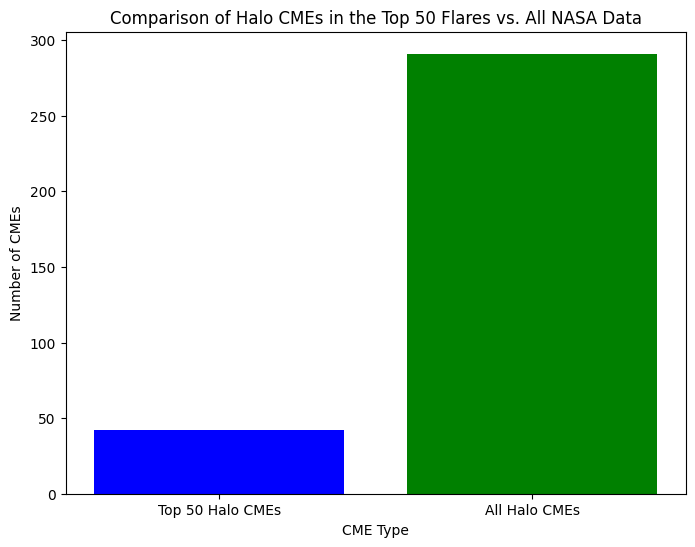

In [10]:
#question 3
#plots

import matplotlib.pyplot as plt
# Calculate the number of Halo CMEs in the top 50 flares
top_50_halo_count = df_nasa_50[df_nasa_50['is_halo'] == True].shape[0]
all_halo_count = df_nasa[df_nasa['is_halo'] == True].shape[0]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Top 50 Halo CMEs', 'All Halo CMEs'], [top_50_halo_count, all_halo_count], color=['blue', 'green'])
plt.xlabel('CME Type')
plt.ylabel('Number of CMEs')
plt.title('Comparison of Halo CMEs in the Top 50 Flares vs. All NASA Data')
plt.show()


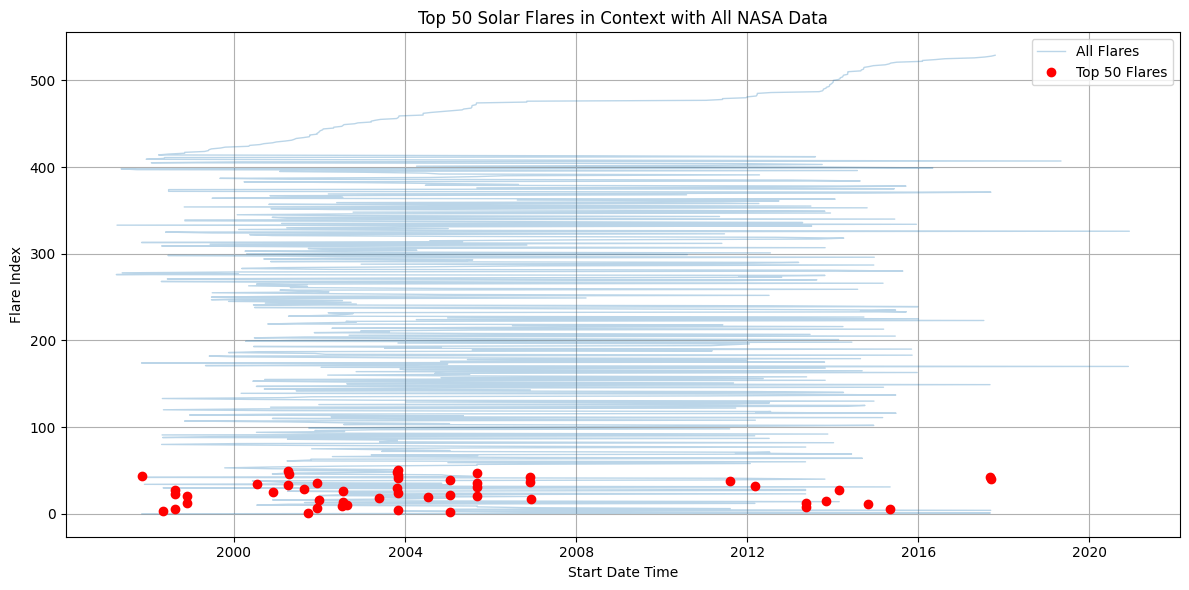

In [11]:
#other way (optional)

# Plot all solar flares in the NASA dataset
plt.figure(figsize=(12, 6))
plt.plot(df_nasa['start_datetime'], range(len(df_nasa)), label='All Flares', linewidth=1, alpha=0.3)

# Plot the top 50 solar flares
plt.plot(df['Start Datetime'], range(len(df), len(df) - 50, -1), 'ro', label='Top 50 Flares')

plt.xlabel('Start Date Time')
plt.ylabel('Flare Index')
plt.title('Top 50 Solar Flares in Context with All NASA Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
